In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #seaborn為python繪圖函式庫，以matplotlib為基礎封裝了許多實用的統計圖表，相較於matplotlib，seaborn的預設圖形更為好看
from scipy.stats import boxcox_normmax, skew
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn import preprocessing


In [279]:
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [280]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [281]:
# X處理的對象
y = train_df["SalePrice"]
# X = train_df.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

X = train_df.drop(["Id", "SalePrice"], axis=1)

In [282]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [283]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


-0.05453796427128287


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

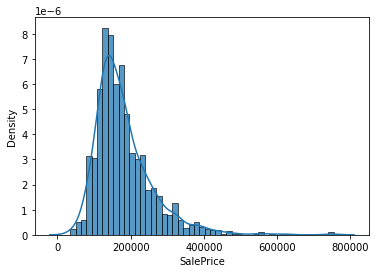

In [285]:
#計算輸入數據的最佳Box-Cox轉換參數
print(boxcox_normmax(y + 1))
#此函數可以對每個 bin 內計算的統計量進行歸一化以估計頻率、密度或概率質量，並且可以添加使用核密度估計獲得的平滑曲線，類似於kdeplot()
plt.figure()

sns.histplot(y, stat='density') #歸一化計數，使直方圖的面積為 1

# KDE是一種可視化數據集中觀測值分佈的方法，類似於直方圖。
# KDE使用一維或多維的連續概率密度曲線表示數據
sns.kdeplot(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

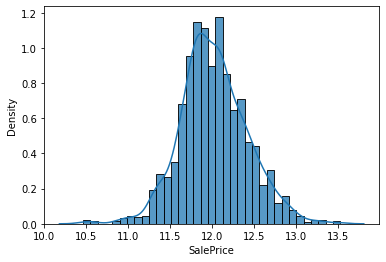

In [286]:
# 將其轉為常態分佈
# log1p = log（x+1）
# log1p( ) 將據壓縮到了一個區間，與數據的標準類似。其逆運算就是expm1的函數
y_train_norm = np.log1p(y)

plt.figure()

sns.histplot(y_train_norm, stat='density')
sns.kdeplot(y_train_norm)

In [287]:
# 取出所有是數字型態的欄位
num_col = X.dtypes[X.dtypes != "object"]
index = num_col.index.drop("MSSubClass") # Remove"MSSubClass"
#data_num = X[index]
#data_num
X = X[index]
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,8,2007
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2,2010
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,5,2010
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,4,2010


In [284]:
#skewness and kurtosis
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [288]:
# 計算每個欄位的偏態(=0, >0, <0)
# skewness = 3(Mean-Median)/Standard Deviation
# DataFrame.dropna => Remove missing values

#skewness = data_num.apply(lambda s:skew(s.dropna()))
skewness = X.apply(lambda s:skew(s.dropna()))
skewness.sort_values()

GarageYrBlt      -0.648708
YearBuilt        -0.612831
YearRemodAdd     -0.503044
GarageCars       -0.342197
FullBath          0.036524
YrSold            0.096170
GarageArea        0.179796
BedroomAbvGr      0.211572
MoSold            0.211835
OverallQual       0.216721
BsmtFullBath      0.595454
Fireplaces        0.648898
HalfBath          0.675203
TotRmsAbvGrd      0.675646
OverallCond       0.692355
2ndFlrSF          0.812194
BsmtUnfSF         0.919323
GrLivArea         1.365156
1stFlrSF          1.375342
TotalBsmtSF       1.522688
WoodDeckSF        1.539792
BsmtFinSF1        1.683771
LotFrontage       2.160866
OpenPorchSF       2.361912
MasVnrArea        2.666326
EnclosedPorch     3.086696
BsmtHalfBath      4.099186
ScreenPorch       4.117977
BsmtFinSF2        4.250888
KitchenAbvGr      4.483784
LowQualFinSF      9.002080
3SsnPorch        10.293752
LotArea          12.195142
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [297]:
#Split dataset into training/testing data #將數據集拆分為訓練/測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [298]:
my_imputer = SimpleImputer() # Imputation transformer for completing missing values
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [ ]:
#Data Normalization
#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train = scaler.transform(X_train)

In [312]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge  
from sklearn.linear_model import Lasso  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR 

knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

In [315]:
knn.fit(X_train, y_train)
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
decision.fit(X_train, y_train)
svr.fit(X_train, y_train)

y_pre_knn = knn.predict(X_test)
y_pre_linear = linear.predict(X_test)
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)
y_pre_decision = decision.predict(X_test)
y_pre_svr = svr.predict(X_test)
 
print(linear.coef_)  # w值
print(linear.intercept_) # b值

[ 14077.49650428  92720.03482146 144579.44394885  38303.55567236
  38533.27798692   9060.41309197  57095.13754407  53573.58931515
  -1002.53412478   5809.47854904  51466.86492395 109573.53666575
  40063.27113595 -14190.8212403  104171.78876155  15805.19894184
   3916.05756056  20095.90054601  -7155.59442707 -75315.65554403
 -67080.9000334   71626.95155676   9573.37121127   6641.88811747
  45688.72538441    262.20205906  19091.28484118  -1969.04289037
   8327.28689314   6837.47900185  31417.31717144 -16542.88133162
  -4486.27647238  -2090.98569022  -3287.90387282]
-46138.811634299374


In [317]:
#R2 決定擬合度。模型越好：r2→1；模型越差：r2→0
knn_score = r2_score(y_test, y_pre_knn)
linear_score = r2_score(y_test, y_pre_linear)
ridge_score = r2_score(y_test, y_pre_ridge)
lasso_score = r2_score(y_test, y_pre_lasso)
decision_score = r2_score(y_test, y_pre_decision)
svr_score = r2_score(y_test, y_pre_svr)


print('knn_score R2 score: {}'.format(knn_score))
print('linear_score R2 score: {}'.format(linear_score))
print('ridge_score R2 score: {}'.format(ridge_score))
print('lasso_score R2 score: {}'.format(lasso_score ))
print('decision_score R2 score: {}'.format(decision_score))
print('svr_score R2 score: {}'.format(svr_score))

knn_score R2 score: 0.7532158854115742
linear_score R2 score: 0.8633960154476261
ridge_score R2 score: 0.8589181919127709
lasso_score R2 score: 0.8633835478962834
decision_score R2 score: 0.7803772060962761
svr_score R2 score: -0.10218405642564532


In [307]:
# 可以得出(線性回歸)LinearRegression 效果最好 
# The coefficients
print('Coefficients: {}\n'.format(model.coef_))

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test,  y_pre_linear)))

# Mean absolute error
print("Mean absolute error: {}".format(mean_absolute_error(y_test,  y_pre_linear)))

# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test,  y_pre_linear)))


Coefficients: [ 14077.49650428  92720.03482146 144579.44394885  38303.55567236
  38533.27798692   9060.41309197  57095.13754407  53573.58931515
  -1002.53412478   5809.47854904  51466.86492395 109573.53666575
  40063.27113595 -14190.8212403  104171.78876155  15805.19894184
   3916.05756056  20095.90054601  -7155.59442707 -75315.65554403
 -67080.9000334   71626.95155676   9573.37121127   6641.88811747
  45688.72538441    262.20205906  19091.28484118  -1969.04289037
   8327.28689314   6837.47900185  31417.31717144 -16542.88133162
  -4486.27647238  -2090.98569022  -3287.90387282]

Mean squared error: 825101718.2401133
Mean absolute error: 20671.262082980247
R2 score: 0.8633960154476261


#### R2 score => 判斷迴歸模型的解釋力

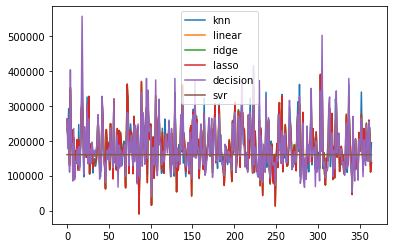

In [321]:
#plt.plot(y_test, label='true')
#plt.legend()

# KNN
plt.plot(y_pre_knn, label='knn')
plt.legend()
 
# Linear
plt.plot(y_pre_linear, label='linear')
plt.legend()
 
# Ridge
plt.plot(y_pre_ridge, label='ridge')
plt.legend()
 
# Lasso
plt.plot(y_pre_lasso, label='lasso')
plt.legend()
 
# Decision
plt.plot(y_pre_decision, label='decision')
plt.legend()
 
# SVR
plt.plot(y_pre_svr, label='svr')
plt.legend()
 
plt.show()


### Standardization 平均&變異數標準化
將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，方差為1。
適合的使用時機於當有些特徵的方差過大時，使用標準化能夠有效地讓模型快速收斂。

### MinMaxScaler 最小最大值標準化
在MinMaxScaler中是給定了一個明確的最大值與最小值。每個特徵中的最小值變成了0，最大值變成了1。數據會縮放到到[0,1]之間。

### MaxAbsScaler 絕對值最大標準化
MaxAbsScaler 與 MinMaxScaler 類似，所有數據都會除以該列絕對值後的最大值。
數據會縮放到到[-1,1]之間。

### RobustScaler 中位數和四分位數標準化
可以有效的縮放帶有outlier的數據，透過Robust如果數據中含有異常值在縮放中會捨去。